In [1]:
import os
import sys
import yfinance as yf
import talib as ta 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns


In [2]:

# List of stock file names (flat list)
stock_files = [
    '../data/historical_data/GOOG_historical_data.csv',
    '../data/historical_data/MSFT_historical_data.csv',
    '../data/historical_data/AAPL_historical_data.csv',
    '../data/historical_data/AMZN_historical_data.csv',
    '../data/historical_data/META_historical_data.csv',
    '../data/historical_data/TSLA_historical_data.csv',
    '../data/historical_data/NVDA_historical_data.csv'
]

# Load data into a dictionary
stock_data = {file.split('/')[-1].split('/')[-1].split('/')[-1].split('_')[0]: pd.read_csv(file,  parse_dates=['Date'], index_col='Date') for file in stock_files}

# Example usage
# Print the keys of the loaded stock data
print(stock_data.keys())

dict_keys(['GOOG', 'MSFT', 'AAPL', 'AMZN', 'META', 'TSLA', 'NVDA'])


In [3]:
import pandas as pd

# List of stock file names
stock_files = [
    '../data/historical_data/GOOG_historical_data.csv',
    '../data/historical_data/MSFT_historical_data.csv',
    '../data/historical_data/AAPL_historical_data.csv',
    '../data/historical_data/AMZN_historical_data.csv',
    '../data/historical_data/META_historical_data.csv',
    '../data/historical_data/TSLA_historical_data.csv',
    '../data/historical_data/NVDA_historical_data.csv'
]

# Load data into a list of DataFrames with stock names
stock_dataframes = []
for file in stock_files:
    stock_name = file.split('/')[-1].split('/')[-1].split('/')[-1].split('_')[0]
    df = pd.read_csv(file)

    # Filter for 'Date' and 'Close' columns and add the stock name
    df_filtered = df[['Date', 'Close']].copy()  # Adjust column names as needed
    df_filtered['Stock'] = stock_name  # Add new column for stock name
    stock_dataframes.append(df_filtered)

# Combine all DataFrames into one
combined_data = pd.concat(stock_dataframes, ignore_index=True)

# Example usage
print(combined_data.head())  # Display the first few rows of the combined DataFrame

         Date     Close Stock
0  2004-08-19  2.499133  GOOG
1  2004-08-20  2.697639  GOOG
2  2004-08-23  2.724787  GOOG
3  2004-08-24  2.611960  GOOG
4  2004-08-25  2.640104  GOOG


In [28]:
combined_data.to_csv('combined_stock.csv', index=False)

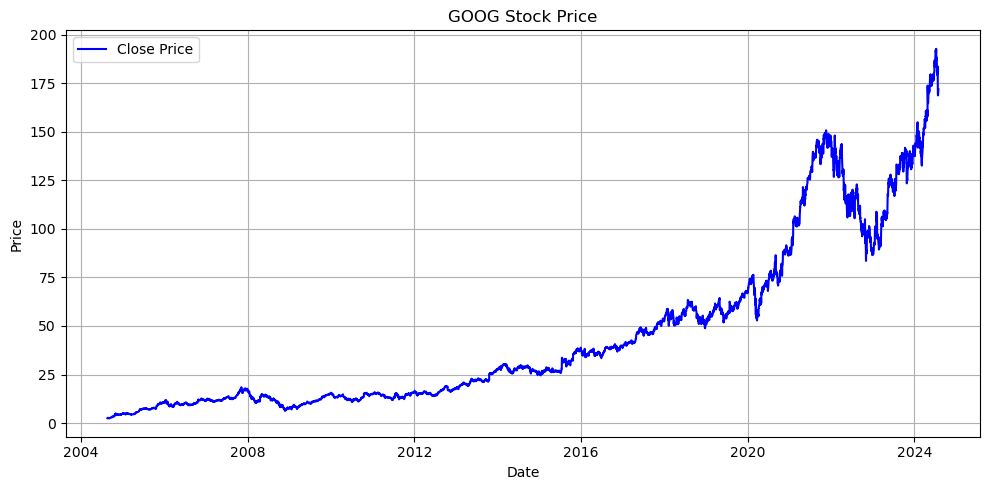

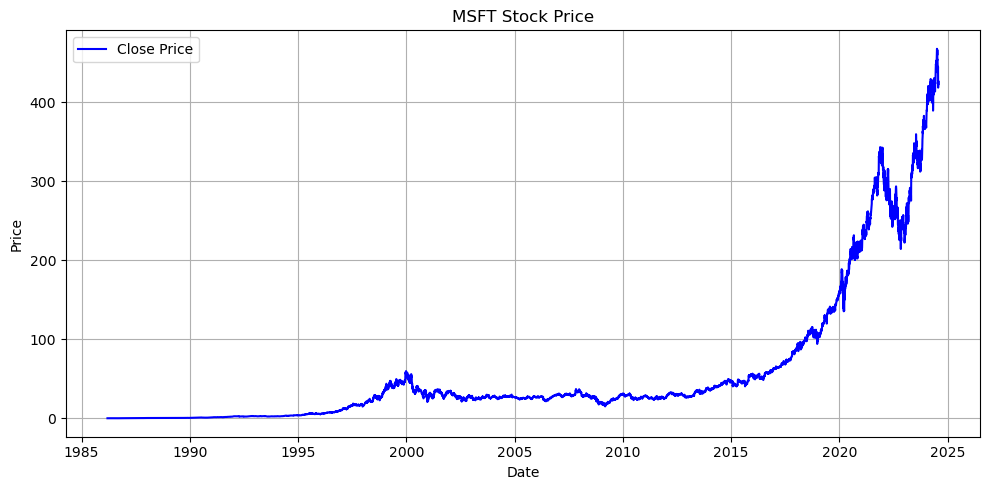

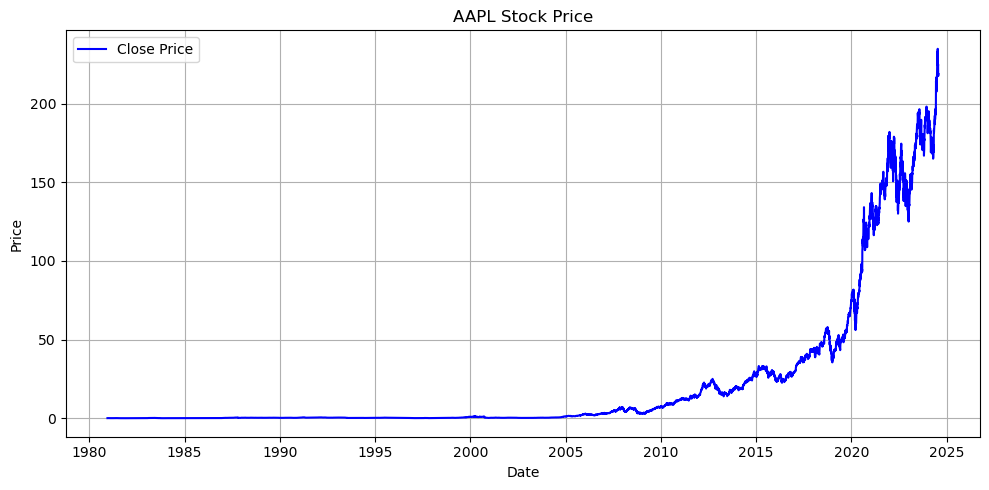

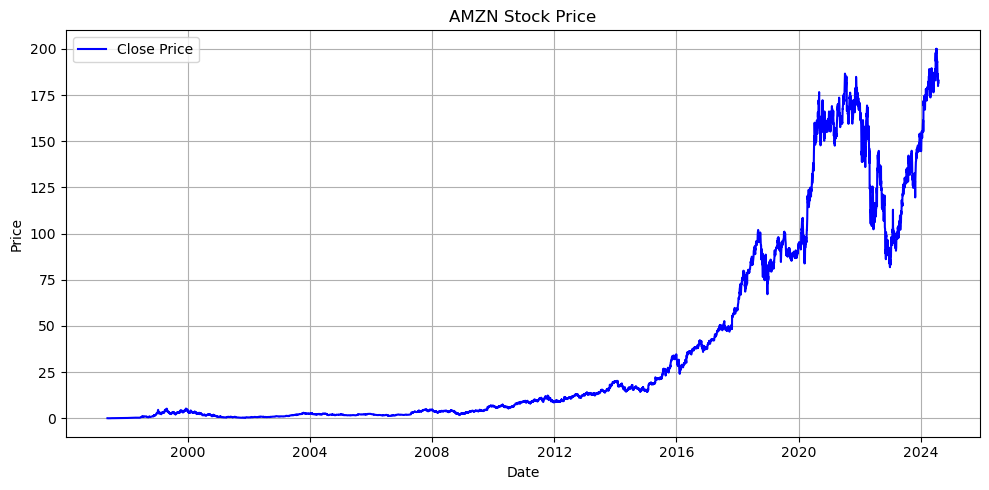

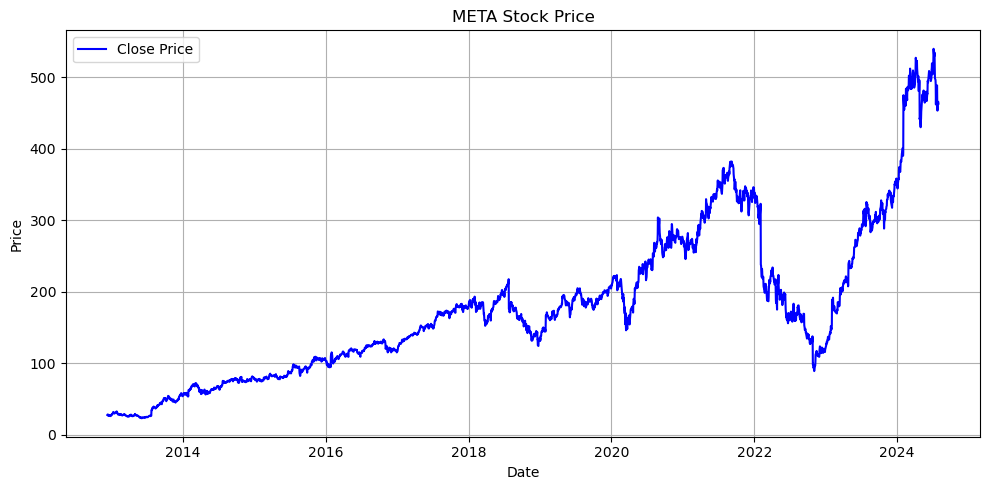

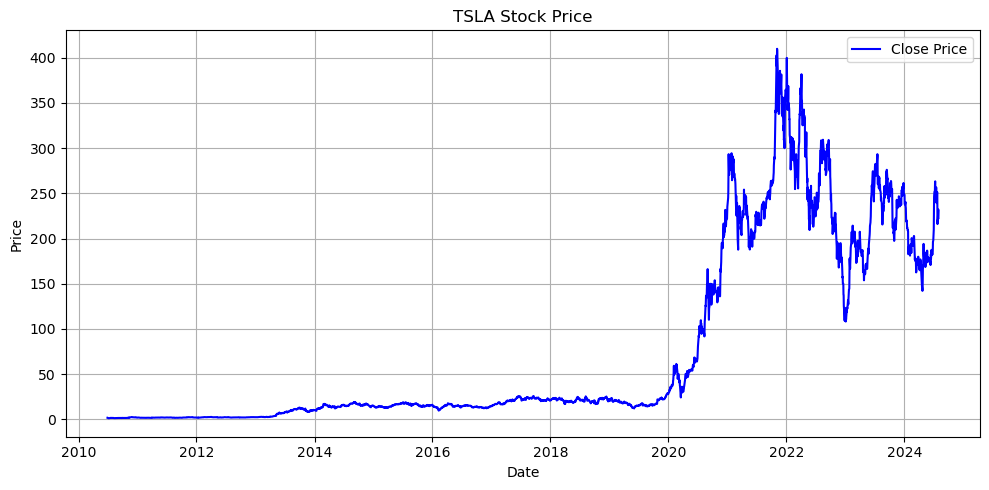

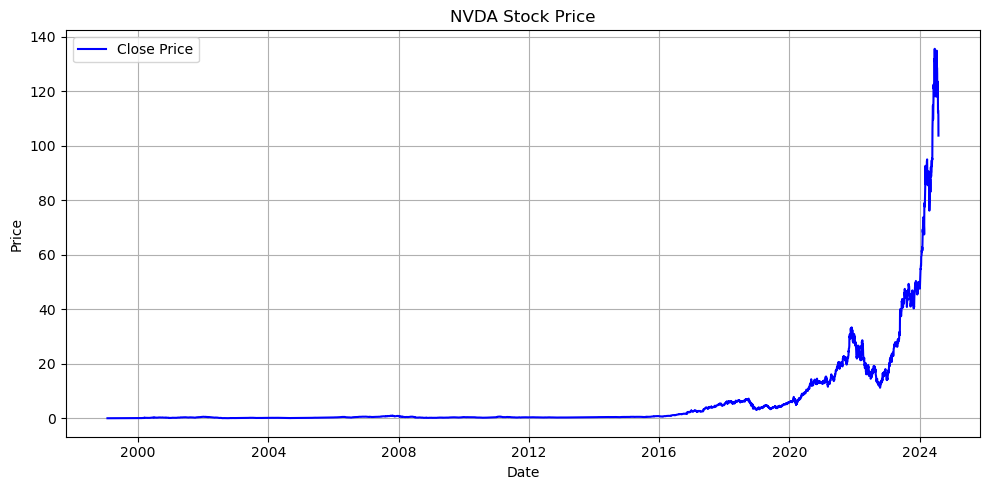

In [21]:

def plot_stock(stock_name, data):
    plt.figure(figsize=(10, 5))
    
    # Plot Closing Price
    plt.plot(data.index, data['Close'], label='Close Price', color='blue')
    plt.title(f"{stock_name} Stock Price")
    plt.ylabel('Price')
    plt.xlabel('Date')
    plt.legend()
    plt.grid()
    
    plt.tight_layout()
    plt.show()

# Plot each stock's closing price
for stock, data in stock_data.items():
    plot_stock(stock, data)

In [12]:
# Example indicators to apply
def apply_indicators(data):
    data['SMA'] = ta.SMA(data['Close'], timeperiod=50)  
    data['RSI'] = ta.RSI(data['Close'], timeperiod=14) 
    data['EMA'] = ta.EMA(data['Close'], timeperiod=21)
    macd, macd_signal, _ = ta.MACD(data['Close'])
    data['MACD'] = macd
    data['MACD_Signal'] = macd_signal
    return data

# Apply indicators to each stock
for stock, data in stock_data.items():
    stock_data[stock] = apply_indicators(data)

In [14]:
for stock, data in stock_data.items():
    print(f"Results for {stock}:")
    print(data[[ 'Close', 'SMA', 'RSI', 'EMA', 'MACD', 'MACD_Signal']].tail())  # Print last few rows

Results for GOOG:
                 Close       SMA        RSI         EMA      MACD  MACD_Signal
Date                                                                          
2024-07-24  174.369995  180.3948  37.434718  183.042836 -0.034166     1.571016
2024-07-25  169.160004  180.3600  32.279082  181.780760 -1.106693     1.035474
2024-07-26  168.679993  180.2950  31.843937  180.589781 -1.972672     0.433845
2024-07-29  171.130005  180.2400  36.545844  179.729802 -2.433223    -0.139569
2024-07-30  171.860001  180.1686  37.920068  179.014365 -2.708091    -0.653273
Results for MSFT:
                 Close         SMA        RSI         EMA      MACD  \
Date                                                                  
2024-07-24  428.899994  438.804000  36.980921  446.146067 -0.684986   
2024-07-25  418.399994  438.897599  31.696381  443.623697 -2.740453   
2024-07-26  425.269989  439.071799  37.944660  441.955178 -3.771598   
2024-07-29  426.730011  439.144800  39.217239  440.57107

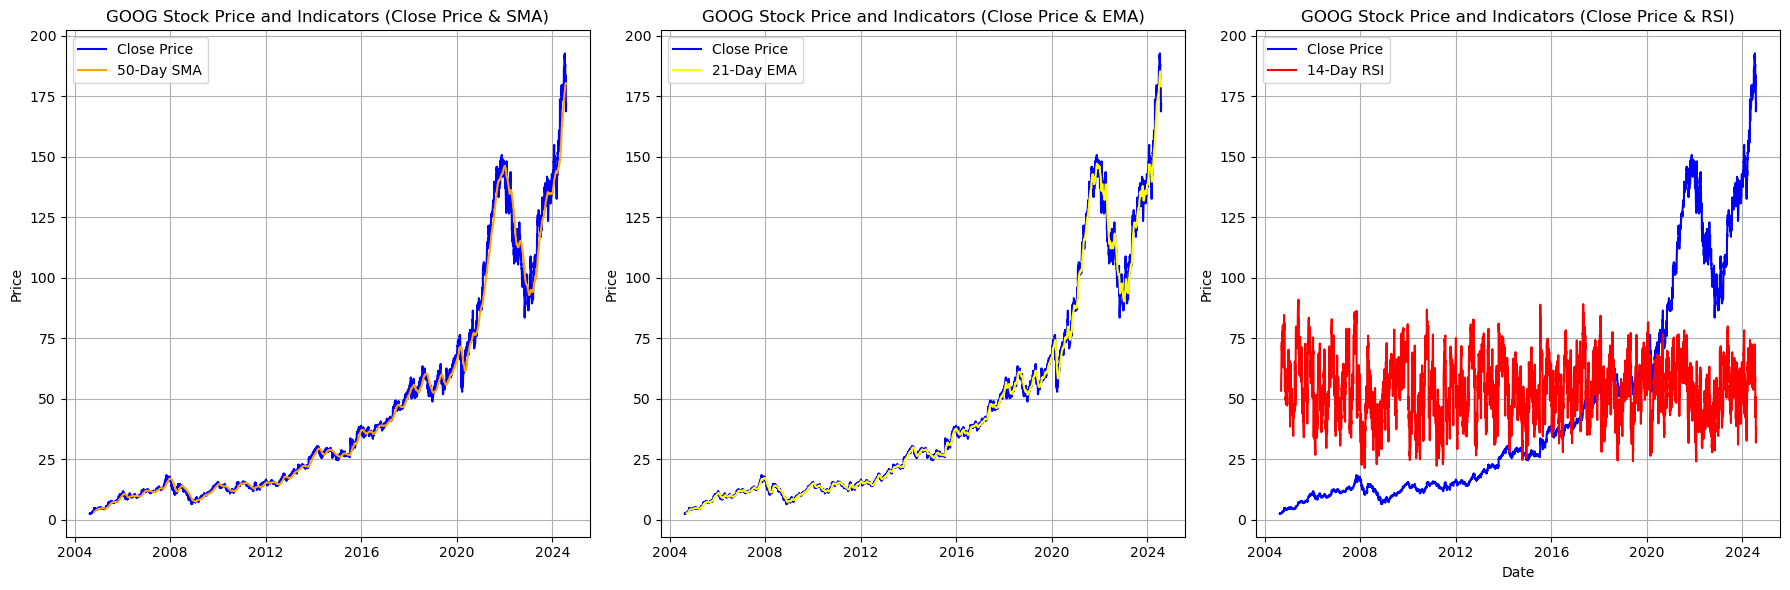

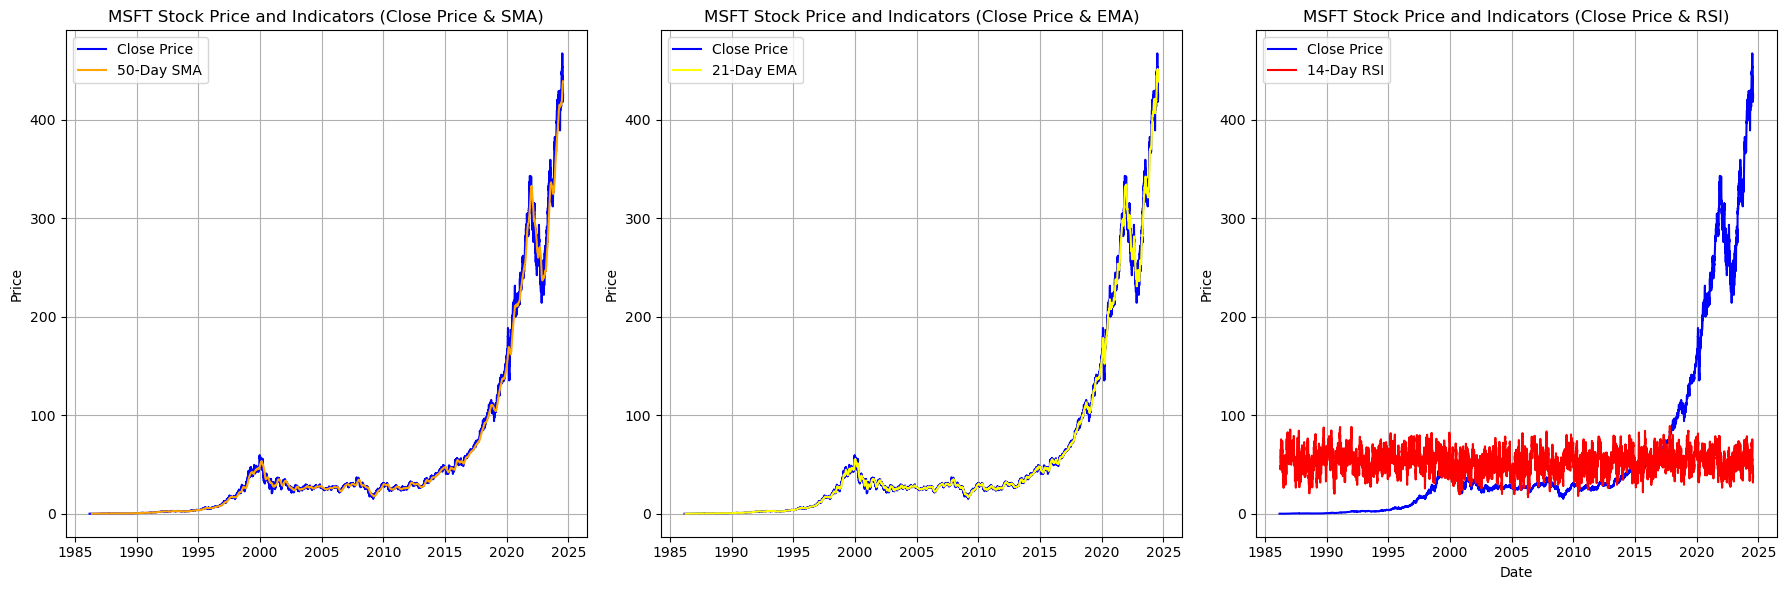

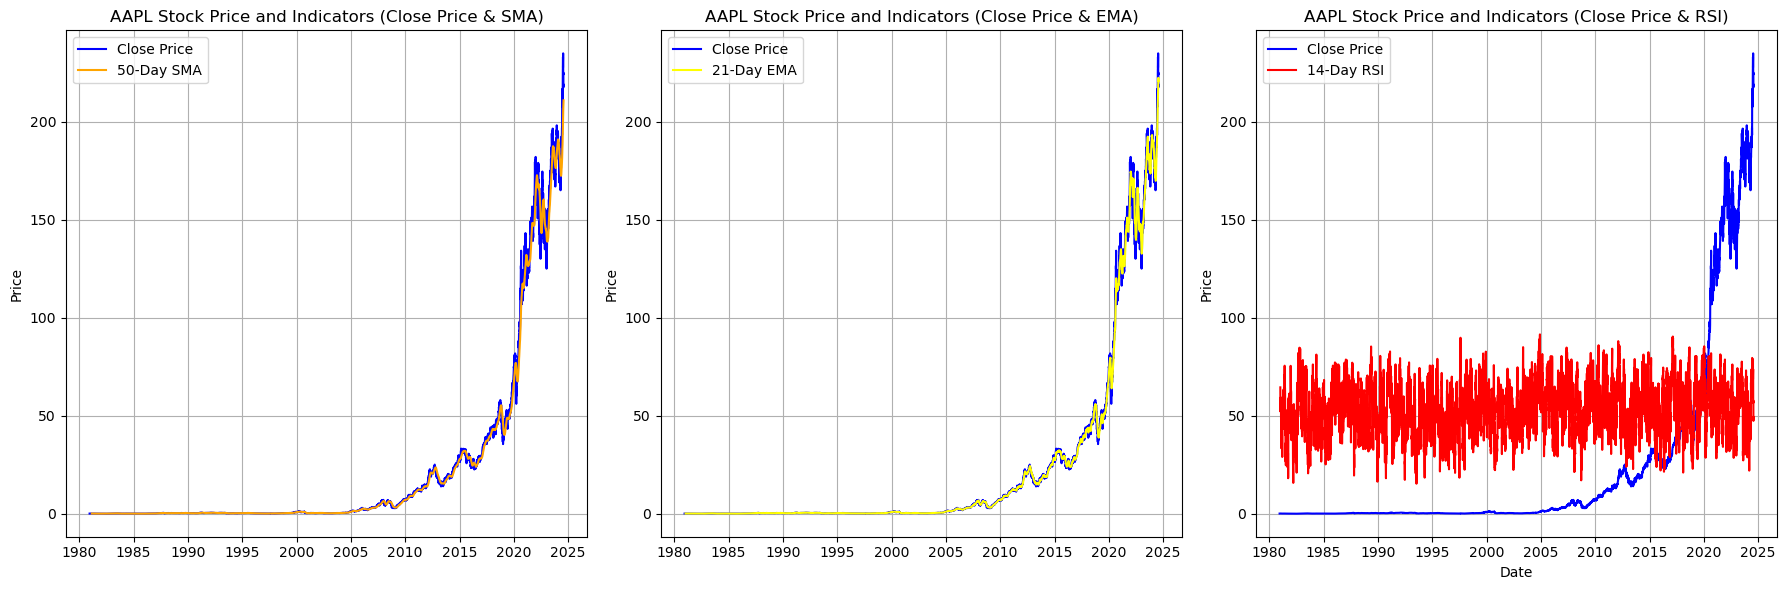

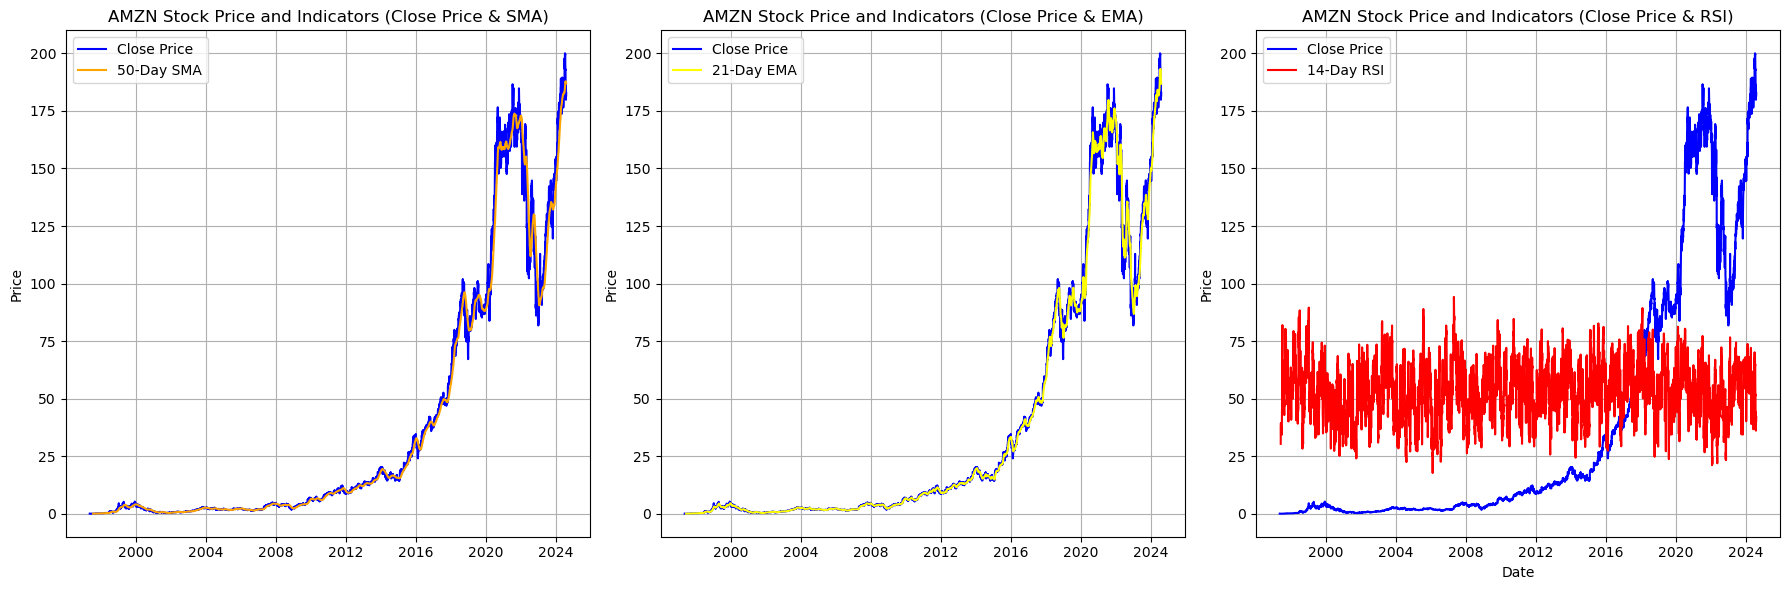

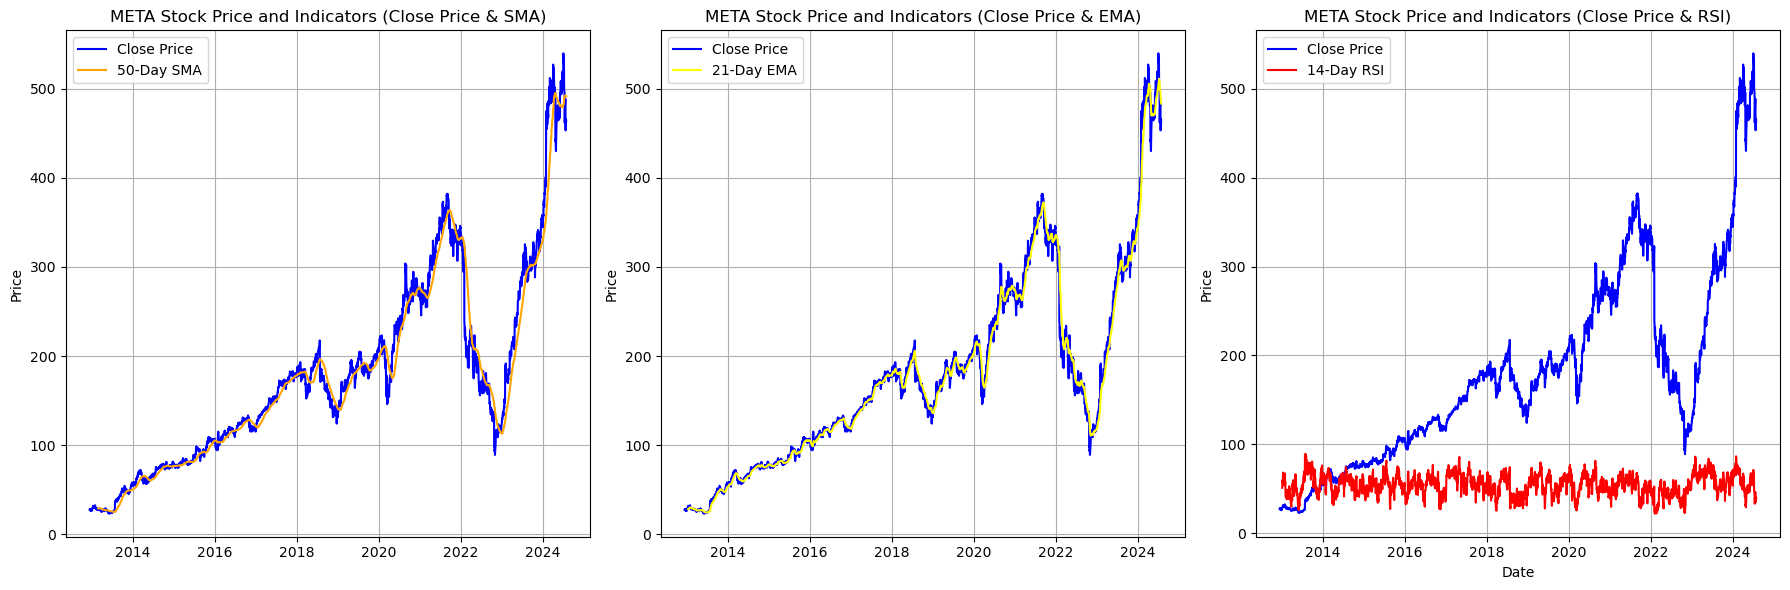

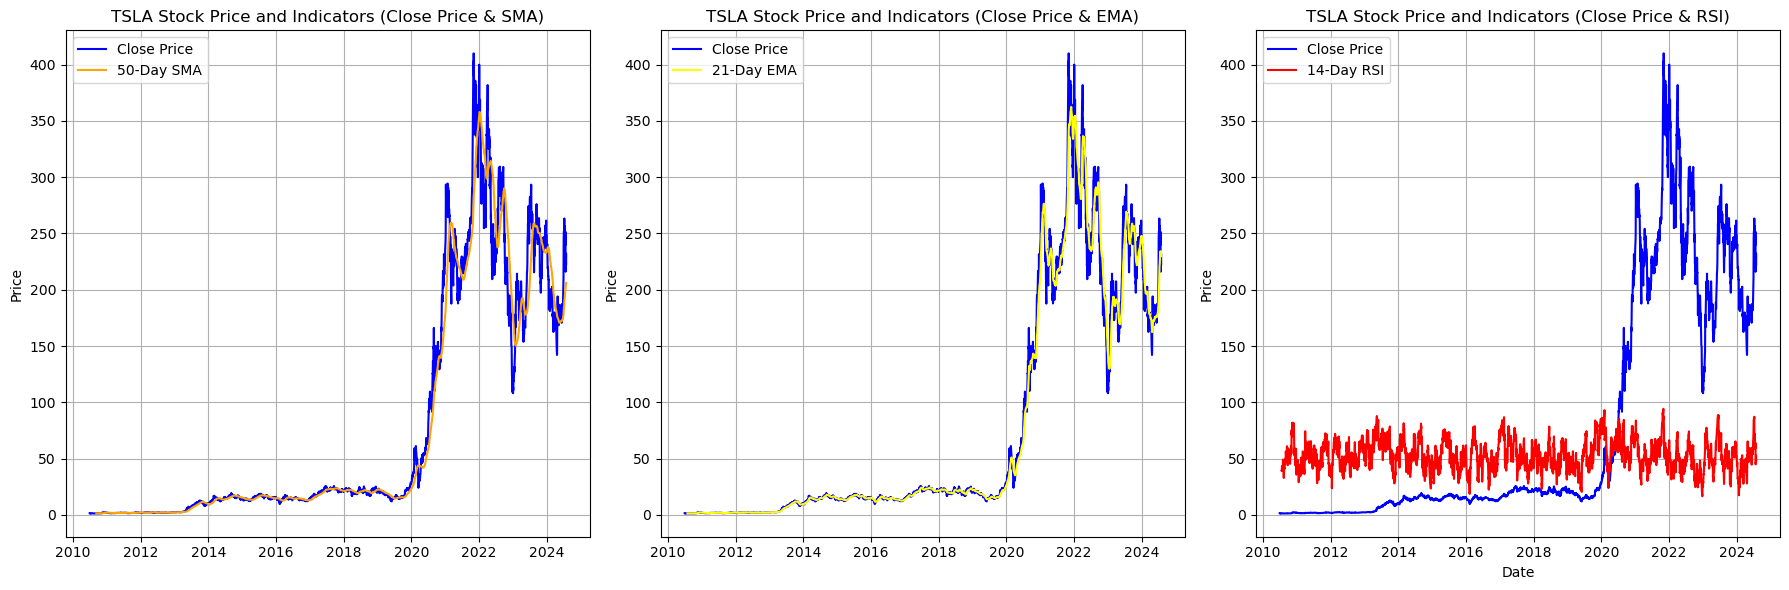

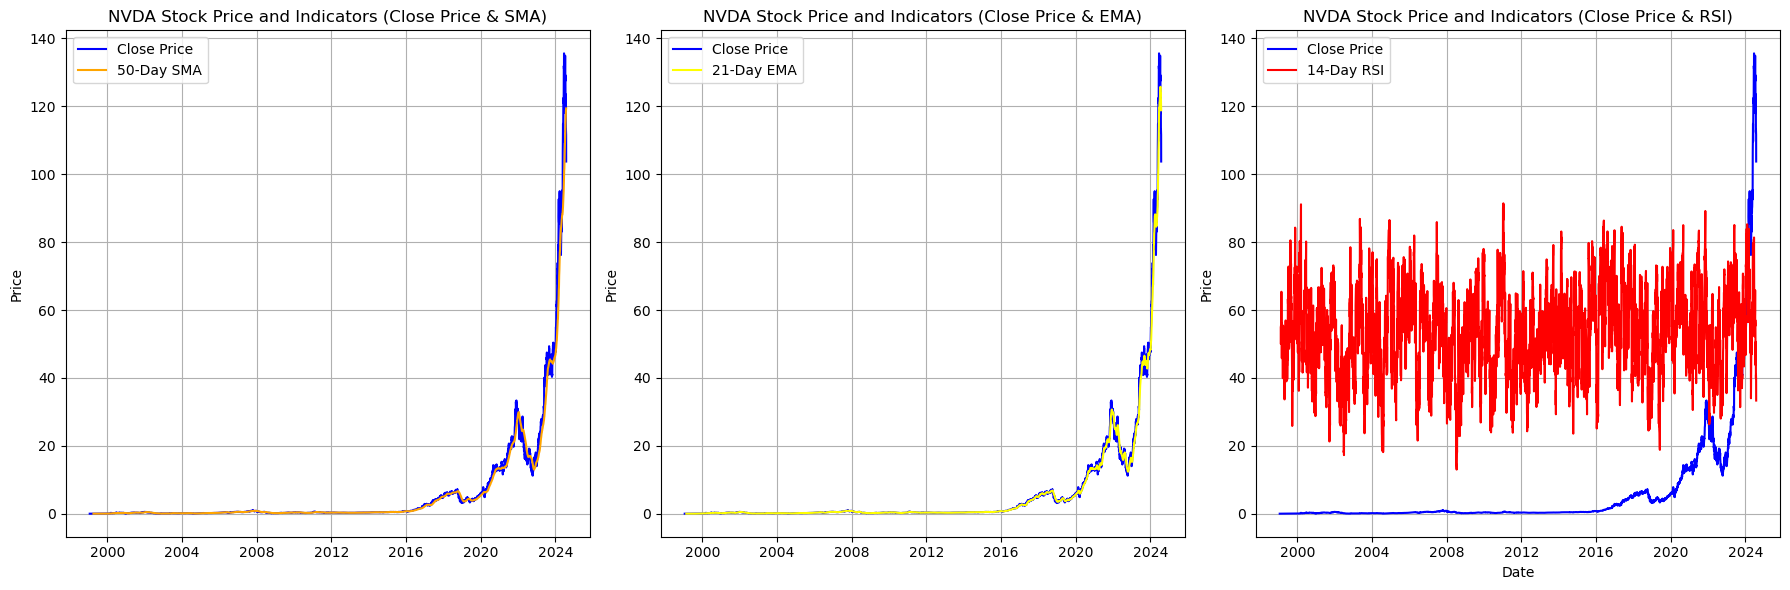

In [20]:

def plot_stock_data(stock_name, data):
    fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharex=True)

    # First subplot: Close Price, 50-Day SMA, and RSI
    axs[0].plot(data.index, data['Close'], label='Close Price', color='blue')
    axs[0].plot(data.index, data['SMA'], label='50-Day SMA', color='orange')
    axs[0].set_title(f"{stock_name} Stock Price and Indicators (Close Price & SMA)")
    axs[0].set_ylabel('Price')
    axs[0].legend()
    axs[0].grid()

    # Second subplot: Close Price, 14-Day RSI, and 21-Day EMA
    axs[1].plot(data.index, data['Close'], label='Close Price', color='blue')
    axs[1].plot(data.index, data['EMA'], label='21-Day EMA', color='yellow')
    axs[1].set_title(f"{stock_name} Stock Price and Indicators (Close Price & EMA)")
    axs[1].set_ylabel('Price')
    axs[1].legend()
    axs[1].grid()

    # Second subplot: Close Price, 14-Day RSI, and 21-Day EMA
    axs[2].plot(data.index, data['Close'], label='Close Price', color='blue')
    axs[2].plot(data.index, data['RSI'], label='14-Day RSI', color='red')
    axs[2].set_title(f"{stock_name} Stock Price and Indicators (Close Price & RSI)")
    axs[2].set_ylabel('Price')
    axs[2].legend()
    axs[2].grid()

    
    plt.xlabel('Date')
    plt.tight_layout()
    plt.show()

# Plot each stock
for stock, data in stock_data.items():
    plot_stock_data(stock, data)